In [1]:
import json
import time
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from numpy import newaxis
from tensorflow.keras.layers import Dense, Activation, Dropout, LSTM
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

In [2]:
from math import pi,sqrt,exp,pow,log
from numpy.linalg import det, inv
from abc import ABCMeta, abstractmethod
from sklearn import cluster

In [3]:
import statsmodels.api as sm 
import scipy.stats as scs
import scipy.optimize as sco
import scipy.interpolate as sci
from scipy import stats

In [4]:
df = pd.read_csv("new_date_union_1.csv")

In [5]:
wsj_var=np.var(df.mean_compound)

In [6]:
mu=0

In [7]:
noise=0.1
print(wsj_var)

0.02763231376845216


In [8]:
sigma_wsj=noise*wsj_var

In [9]:
n=df.shape[0]

In [10]:
df_noise=pd.DataFrame()

In [11]:
df_noise['noise']=df['mean_compound']

In [12]:
for i in range(0,n):
    df_noise['noise'][i]+=np.random.normal(mu,sigma_wsj)
    

In [13]:
df_noise.to_csv("new_price_noise0.csv")

In [14]:
dfn=pd.read_csv("new_price_noise0.csv",index_col=0)  

In [16]:
df_1n=pd.DataFrame()
# df_1n['wsj']=dfn['noise']   #with noise
df_1n['wsj']=df['mean_compound']  # no noise
df_1n['price']=df['c']

In [17]:
split = (0.85)
sequence_length=10;
normalise= True
batch_size=100;
input_dim=2
input_timesteps=9
neurons=50
epochs=5
prediction_len=1
dense_output=1
drop_out=0

In [18]:
df1=df_1n
i_split = int(len(df1) * split)

In [19]:
cols = ['price','wsj']
data_train_1 = df1.get(cols).values[:i_split]


In [20]:
data_train_1.shape

(1159, 2)

In [21]:
len_train  = len(data_train_1)
len_train_windows = None

In [22]:
data_windows = []
for i in range(len_train - sequence_length):
    data_windows.append(data_train_1[i:i+sequence_length])
data_windows = np.array(data_windows).astype(float)
  
window_data=data_windows
win_num=window_data.shape[0]
col_num=window_data.shape[2]

In [23]:
normalised_data = []
record_min=[]
record_max=[]

In [24]:
for win_i in range(0,win_num):
    normalised_window = []
    for col_i in range(0,1):#col_num):
        temp_col=window_data[win_i,:,col_i]
        temp_min=min(temp_col)
        if col_i==0:
            record_min.append(temp_min)#record min
        temp_col=temp_col-temp_min
        temp_max=max(temp_col)
        if col_i==0:
            record_max.append(temp_max)#record max
        temp_col=temp_col/temp_max
        normalised_window.append(temp_col)
    for col_i in range(1,col_num):
        temp_col=window_data[win_i,:,col_i]
        normalised_window.append(temp_col)
    normalised_window = np.array(normalised_window).T
    normalised_data.append(normalised_window)
normalised_data=np.array(normalised_data)

In [25]:
data_windows=normalised_data
x_train1 = data_windows[:, :-1]
y_train1 = data_windows[:, -1,[0]]
print('x_train1.shape',x_train1.shape)
print('y_train1.shape',y_train1.shape)

x_train1.shape (1149, 9, 2)
y_train1.shape (1149, 1)


In [26]:
y_train1[:50]

array([[0.        ],
       [0.0729355 ],
       [0.        ],
       [0.        ],
       [0.03185703],
       [0.        ],
       [0.        ],
       [0.29166667],
       [0.23643411],
       [0.77529566],
       [0.        ],
       [0.07216495],
       [0.33364574],
       [0.42174321],
       [0.06654171],
       [0.47235239],
       [0.62511715],
       [0.5267104 ],
       [0.23149016],
       [0.32983508],
       [0.        ],
       [0.        ],
       [0.06089744],
       [0.03910256],
       [0.30128205],
       [0.53205128],
       [0.65979381],
       [0.65614035],
       [0.83557951],
       [0.91145833],
       [0.80416667],
       [0.9243604 ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.97930556],
       [0.90178241],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.98196393],
       [1.        ],
       [1.        ],
       [0.95619019],
       [1.        ],
       [1.        ],
       [1.   

In [27]:
x_train_t=x_train1
print(x_train_t.shape)
x_train=x_train_t

(1149, 9, 2)


In [28]:
y_train_t=y_train1
print(y_train_t.shape)
y_train=y_train_t

(1149, 1)


In [29]:
y_train

array([[0.        ],
       [0.0729355 ],
       [0.        ],
       ...,
       [0.35896104],
       [0.13766234],
       [0.06629834]])

In [30]:
dataframe= pd.read_csv("new_date_union_1.csv")
dataframe.columns=['date','wsj','price']
cols = ['price','wsj']
len_dataframe=dataframe.shape[0]

In [31]:
i_split = int(len(dataframe) * split)
data_test  = dataframe.get(cols).values[i_split:]

In [32]:
len_test   = len(data_test)
len_train_windows = None

In [33]:
print('data_test.shape',data_test.shape)

data_test.shape (205, 2)


In [34]:
data_windows = []
for i in range(len_test - sequence_length):
    data_windows.append(data_test[i:i+sequence_length])

In [35]:
data_windows = np.array(data_windows).astype(float)

In [36]:
y_test_ori = data_windows[:, -1, [0]]
print('y_test_ori.shape',y_test_ori.shape)

y_test_ori.shape (195, 1)


In [37]:
y_test_ori

array([[146.82  ],
       [149.55  ],
       [153.98  ],
       [178.3   ],
       [184.39  ],
       [206.8   ],
       [239.4   ],
       [215.85  ],
       [196.2   ],
       [174.85  ],
       [189.35  ],
       [195.3   ],
       [194.2   ],
       [189.25  ],
       [194.95  ],
       [185.66  ],
       [187.8   ],
       [185.51  ],
       [175.3   ],
       [174.19  ],
       [169.51  ],
       [191.68  ],
       [180.74  ],
       [181.45  ],
       [181.1   ],
       [187.1   ],
       [179.34  ],
       [180.77  ],
       [173.25  ],
       [178.35  ],
       [177.3   ],
       [182.9   ],
       [186.28  ],
       [178.5   ],
       [176.33  ],
       [174.85  ],
       [179.2   ],
       [179.12  ],
       [176.55  ],
       [174.15  ],
       [170.15  ],
       [170.7   ],
       [165.5   ],
       [163.1   ],
       [157.95  ],
       [162.29  ],
       [164.96  ],
       [175.6   ],
       [172.    ],
       [170.07  ],
       [178.4   ],
       [180.39  ],
       [175.

In [38]:
window_data=data_windows
win_num=window_data.shape[0]
col_num=window_data.shape[2]
normalised_data = []
record_min=[]
record_max=[]

In [39]:
for win_i in range(0,win_num):
    normalised_window = []
    for col_i in range(0,1):#col_num):
        temp_col=window_data[win_i,:,col_i]
        temp_min=min(temp_col)
        if col_i==0:
            record_min.append(temp_min)#record min
        temp_col=temp_col-temp_min
        temp_max=max(temp_col)
        if col_i==0:
            record_max.append(temp_max)#record max
        temp_col=temp_col/temp_max
        normalised_window.append(temp_col)
    for col_i in range(1,col_num):
        temp_col=window_data[win_i,:,col_i]
        normalised_window.append(temp_col)
    normalised_window = np.array(normalised_window).T
    normalised_data.append(normalised_window)
normalised_data=np.array(normalised_data)

In [40]:
data_windows=normalised_data#get_test_data
x_test = data_windows[:, :-1]
y_test = data_windows[:, -1, [0]]
print('x_test.shape',x_test.shape)
print('y_test.shape',y_test.shape)

x_test.shape (195, 9, 2)
y_test.shape (195, 1)


In [41]:
y_test

array([[0.73089358],
       [0.71709234],
       [0.89115914],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.74562541],
       [0.53337654],
       [0.30276518],
       [0.44296049],
       [0.48372746],
       [0.29976762],
       [0.22308288],
       [0.31138652],
       [0.16746708],
       [0.31585366],
       [0.49929742],
       [0.02200489],
       [0.        ],
       [0.        ],
       [0.87146226],
       [0.44143082],
       [0.46933962],
       [0.52277853],
       [0.79341452],
       [0.44339197],
       [0.50789355],
       [0.16869644],
       [0.39873703],
       [0.21975041],
       [0.6967509 ],
       [0.94079422],
       [0.37906137],
       [0.22238267],
       [0.12279355],
       [0.45663853],
       [0.45049885],
       [0.14873141],
       [0.        ],
       [0.        ],
       [0.03409795],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.20423529],
       [0.33112896],
       [0.948

LSTM MODEL

In [42]:
model = Sequential()
model.add(LSTM(neurons, input_shape=(input_timesteps, input_dim), return_sequences = True))
model.add(Dropout(drop_out))
model.add(LSTM(neurons,return_sequences = True))
model.add(LSTM(neurons,return_sequences =False))
model.add(Dropout(drop_out))
model.add(Dense(dense_output, activation='linear'))
# Compile model
model.compile(loss='mean_squared_error',
                optimizer='adam')
# Fit the model
model.fit(x_train,y_train,epochs=20,batch_size=batch_size)

Train on 1149 samples
Epoch 1/20
1149/1149 [==============================] - 7s 6ms/sample - loss: 0.3347
Epoch 2/20
1149/1149 [==============================] - 0s 40us/sample - loss: 0.1958
Epoch 3/20
1149/1149 [==============================] - 0s 40us/sample - loss: 0.1668
Epoch 4/20
1149/1149 [==============================] - 0s 39us/sample - loss: 0.1493
Epoch 5/20
1149/1149 [==============================] - 0s 39us/sample - loss: 0.1294
Epoch 6/20
1149/1149 [==============================] - 0s 40us/sample - loss: 0.0900
Epoch 7/20
1149/1149 [==============================] - 0s 39us/sample - loss: 0.0800
Epoch 8/20
1149/1149 [==============================] - 0s 40us/sample - loss: 0.0780
Epoch 9/20
1149/1149 [==============================] - 0s 40us/sample - loss: 0.0773
Epoch 10/20
1149/1149 [==============================] - 0s 41us/sample - loss: 0.0773
Epoch 11/20
1149/1149 [==============================] - 0s 41us/sample - loss: 0.0774
Epoch 12/20
1149/1149 [========

ulti sequence predict

In [43]:
data=x_test
prediction_seqs = []
window_size=sequence_length
pre_win_num=int(len(data)/prediction_len)

In [44]:
for i in range(0,pre_win_num):
    curr_frame = data[i*prediction_len]
    predicted = []
    for j in range(0,prediction_len):
        temp=model.predict(curr_frame[newaxis,:,:])[0]
        predicted.append(temp)
        curr_frame = curr_frame[1:]
        curr_frame = np.insert(curr_frame, [window_size-2], predicted[-1], axis=0)
    prediction_seqs.append(predicted)

e_predicted

In [45]:
de_predicted=[]
len_pre_win=int(len(data)/prediction_len)
len_pre=prediction_len

In [46]:
m=0
for i in range(0,len_pre_win):
    for j in range(0,len_pre):
        de_predicted.append(prediction_seqs[i][j][0]*record_max[m]+record_min[m])
        m=m+1
print(de_predicted)

[148.21374681689738, 154.39112012684345, 151.9748013883829, 174.80820093333722, 181.7469447493553, 204.06171693086625, 242.98825799226762, 240.71659790039064, 239.39096670985222, 229.2898611009121, 214.953343847394, 213.05001308679581, 221.14295799434186, 212.85405519902707, 207.27504017055034, 208.89299777448178, 195.74879482984542, 181.35077496618032, 181.93645785599946, 176.66291054323315, 171.31249653227627, 173.20097205400467, 176.15453933238982, 178.29545145988465, 179.75162319898604, 181.4682359457016, 183.58431716382503, 184.26221330583095, 183.2664710879326, 181.93745768368245, 181.6176846009493, 179.66481358110906, 179.046701413393, 179.1371929138899, 180.2262724906206, 181.7022611987591, 181.62494350850582, 182.16681972503662, 182.05275916159152, 181.4934972524643, 177.0144154369831, 178.03109902381897, 167.35285500735046, 165.3657696902752, 160.24415856301783, 160.31581290140747, 162.14830761492252, 161.86849349141121, 163.35554299801586, 166.52753286957739, 170.64862097203

In [98]:
np.save('single_senti.npy',de_predicted)

In[18]:

In [47]:
error = []
diff=y_test.shape[0]-prediction_len*pre_win_num

In [48]:
for i in range(y_test_ori.shape[0]-diff):
    error.append(y_test_ori[i,] - de_predicted[i])
    
squaredError = []
absError = []
for val in error:
    squaredError.append(val * val) 
    absError.append(abs(val))

In [49]:
error_percent=[]
for i in range(len(error)):
    val=absError[i]/y_test_ori[i,]
    val=abs(val)
    error_percent.append(val)

In [50]:
mean_error_percent=sum(error_percent) / len(error_percent)
accuracy=1-mean_error_percent

In [51]:
MSE=sum(squaredError) / len(squaredError)

In [52]:
print("MSE",MSE)
print('accuracy',accuracy)
print('mean_error_percent',mean_error_percent)

MSE [67.99860002]
accuracy [0.97219993]
mean_error_percent [0.02780007]


## Plot the figure

In [53]:
len(de_predicted)

195

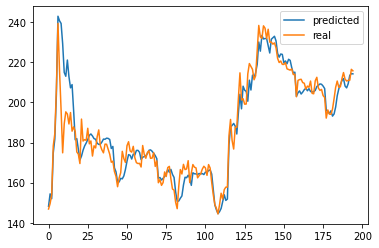

In [54]:
import matplotlib.pyplot as plt
plt.plot(de_predicted, label = 'predicted')
plt.plot(y_test_ori, label = 'real')
plt.legend()

# Train only the stock data

In [101]:
x_train_2 = x_train[:,:,1]
x_train_2 = np.expand_dims(x_train_2, axis = 2)
x_train_2.shape

(1149, 9, 1)

In [102]:
model = Sequential()
model.add(LSTM(neurons, input_shape=(input_timesteps, 1), return_sequences = True))
model.add(Dropout(drop_out))
model.add(LSTM(neurons,return_sequences = True))
model.add(LSTM(neurons,return_sequences =False))
model.add(Dropout(drop_out))
model.add(Dense(dense_output, activation='linear'))
# Compile model
model.compile(loss='mean_squared_error',
                optimizer='adam')
# Fit the model
model.fit(x_train_2,y_train,epochs=50,batch_size=batch_size)

Train on 1149 samples
Epoch 1/50
1149/1149 [==============================] - 3s 2ms/sample - loss: 0.3489
Epoch 2/50
1149/1149 [==============================] - 0s 40us/sample - loss: 0.1538
Epoch 3/50
1149/1149 [==============================] - 0s 39us/sample - loss: 0.1497
Epoch 4/50
1149/1149 [==============================] - 0s 39us/sample - loss: 0.1404
Epoch 5/50
1149/1149 [==============================] - 0s 40us/sample - loss: 0.1393
Epoch 6/50
1149/1149 [==============================] - 0s 39us/sample - loss: 0.1363
Epoch 7/50
1149/1149 [==============================] - 0s 38us/sample - loss: 0.1367
Epoch 8/50
1149/1149 [==============================] - 0s 39us/sample - loss: 0.1363
Epoch 9/50
1149/1149 [==============================] - 0s 39us/sample - loss: 0.1374
Epoch 10/50
1149/1149 [==============================] - 0s 38us/sample - loss: 0.1378
Epoch 11/50
1149/1149 [==============================] - 0s 38us/sample - loss: 0.1381
Epoch 12/50
1149/1149 [========

In [103]:
x_test_2 = x_test[:,:,1]
x_test_2 = np.expand_dims(x_test_2, axis = 2)
x_test_2.shape

(195, 9, 1)

In [104]:
data=x_test_2
prediction_seqs = []
window_size=sequence_length
pre_win_num=int(len(data)/prediction_len)

In [ ]:
for i in range(0,pre_win_num):
    curr_frame = data[i*prediction_len]
    predicted = []
    for j in range(0,prediction_len):
        temp=model.predict(curr_frame[newaxis,:,:])[0]
        predicted.append(temp)
        curr_frame = curr_frame[1:]
        curr_frame = np.insert(curr_frame, [window_size-2], predicted[-1], axis=0)
    prediction_seqs.append(predicted)

In [ ]:
de_predicted=[]
len_pre_win=int(len(data)/prediction_len)
len_pre=prediction_len

In [ ]:
m=0
for i in range(0,len_pre_win):
    for j in range(0,len_pre):
        de_predicted.append(prediction_seqs[i][j][0]*record_max[m]+record_min[m])
        m=m+1
print(de_predicted)

In [58]:
error = []
diff=y_test.shape[0]-prediction_len*pre_win_num

for i in range(y_test_ori.shape[0]-diff):
    error.append(y_test_ori[i,] - de_predicted[i])
    
squaredError = []
absError = []
for val in error:
    squaredError.append(val * val) 
    absError.append(abs(val))
    
error_percent=[]
for i in range(len(error)):
    val=absError[i]/y_test_ori[i,]
    val=abs(val)
    error_percent.append(val)
    
mean_error_percent=sum(error_percent) / len(error_percent)
accuracy=1-mean_error_percent

MSE=sum(squaredError) / len(squaredError)

print("MSE",MSE)
print('accuracy',accuracy)
print('mean_error_percent',mean_error_percent)

MSE [89.94727498]
accuracy [0.9628232]
mean_error_percent [0.0371768]


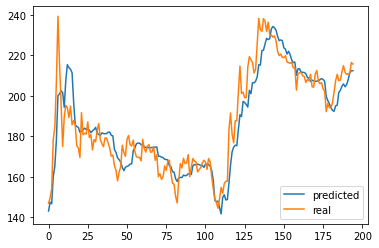

In [59]:
import matplotlib.pyplot as plt
plt.plot(de_predicted, label = 'predicted')
plt.plot(y_test_ori, label = 'real')
plt.legend()